In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pw = open('pw.txt', 'r').read()
user = 'postgres'
db = 'Spotify'

In [3]:
conn = psycopg2.connect(host="localhost", port="5432", database=db, user=user, password=pw)

In [4]:
cursor = conn.cursor()

In [5]:
# List of tables to truncate
truncate_commands = [
    "TRUNCATE TABLE artist CASCADE;",
    "TRUNCATE TABLE track CASCADE;",
    "TRUNCATE TABLE artist_track;",
    "TRUNCATE TABLE metric;",
    "TRUNCATE TABLE platform;"
]

# Truncate tables before inserting new data
for truncate_command in truncate_commands:
    try:
        cursor.execute(truncate_command)
        conn.commit()
        print(f"Successfully truncated table: {truncate_command.split()[2]}")
    except Exception as e:
        conn.rollback()
        print(f"Error while truncating table: {e}")
        
        
# List of COPY commands
copy_commands = [
    """
    COPY artist 
    FROM '/Users/Desktop/Databases Tables/artist_table.csv' 
    CSV HEADER DELIMITER ',';
    """,
    """
    COPY track  
    FROM '/Users/Desktop/Databases Tables/track_table.csv' 
    CSV HEADER DELIMITER ',';
    """,
    """
    COPY Artist_Track  
    FROM '/Users/Desktop/Databases Tables/artist_track_table.csv' 
    CSV HEADER DELIMITER ',';
    """,
    """
    COPY metric
    FROM '/Users/Desktop/Databases Tables/metric_table.csv' 
    CSV HEADER DELIMITER ',';
    """,
    """
    COPY platform
    FROM '/Users/Desktop/Databases Tables/platform_table.csv' 
    CSV HEADER DELIMITER ',';
    """
]

# Execute each COPY command
for command in copy_commands:
    try:
        cursor.execute(command)  # Execute one command at a time
        conn.commit()  # Commit after each successful copy
        print(f"Successfully copied data for command: {command.split()[1]}")
    except Exception as e:
        conn.rollback()  # Rollback in case of an error
        print(f"Error while copying data: {e}")


Successfully truncated table: artist
Successfully truncated table: track
Successfully truncated table: artist_track;
Successfully truncated table: metric;
Successfully truncated table: platform;
Successfully copied data for command: artist
Successfully copied data for command: track
Successfully copied data for command: Artist_Track
Successfully copied data for command: metric
Successfully copied data for command: platform


# 1. Top 10 Artists Most Streamed on Spotify

In [6]:
query = """
SELECT 
    a.Artist_Name,
    COUNT(DISTINCT at.Track_ID) AS Number_of_Songs,
    SUM(t.Streams / 1000000) AS Total_Streams
FROM 
    Artist a
JOIN 
    Artist_Track at ON a.Artist_ID = at.Artist_ID
JOIN 
    Track t ON at.Track_ID = t.Track_ID
GROUP BY 
    a.Artist_Name
ORDER BY 
    Total_Streams DESC
LIMIT 10;
"""

df = pd.read_sql(query, conn)
print(df.head())

    artist_name  number_of_songs  total_streams
0     Bad Bunny               40        23798.0
1    The Weeknd               36        23475.0
2    Ed Sheeran               14        15308.0
3  Taylor Swift               38        14613.0
4  Harry Styles               16        11312.0


/var/folders/22/qj3nptj96b74jyqh28tfl0cc0000gp/T/ipykernel_18913/3038249908.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


/var/folders/22/qj3nptj96b74jyqh28tfl0cc0000gp/T/ipykernel_18913/606268274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='artist_name', y='total_streams', data=df, palette='coolwarm')


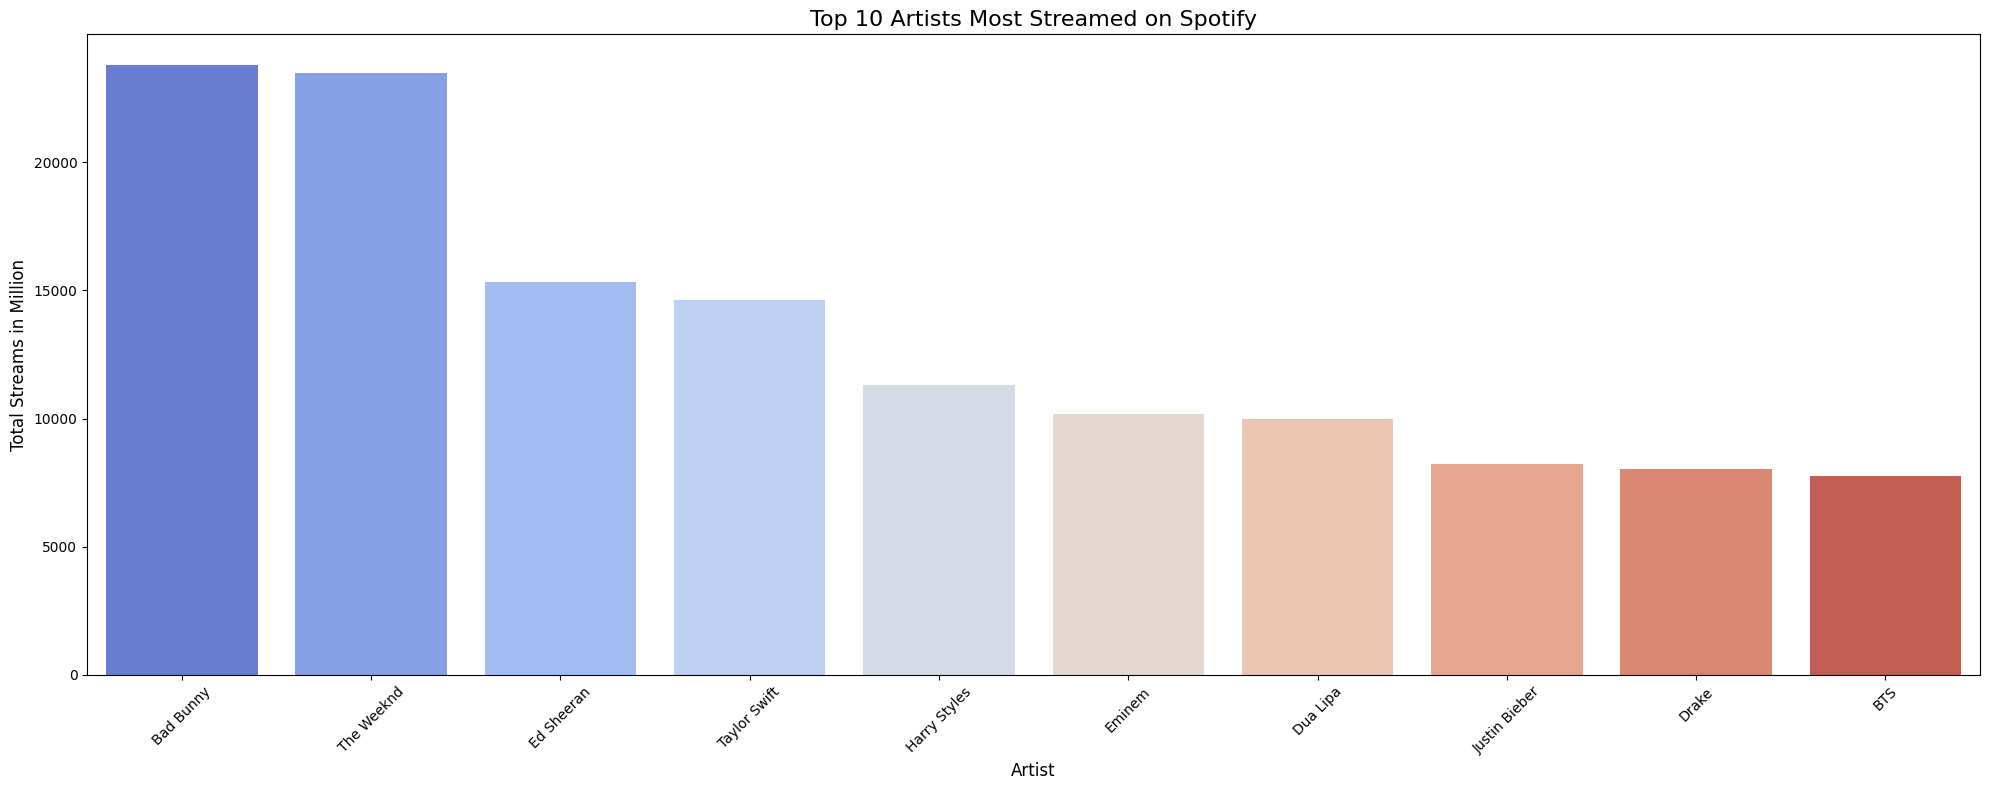

In [7]:
# Plotting the bar plot for total streams
plt.figure(figsize=(20, 8))
sns.barplot(x='artist_name', y='total_streams', data=df, palette='coolwarm')
plt.title('Top 10 Artists Most Streamed on Spotify', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Total Streams in Million', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interpretation:

The bar plot above showcases the top 10 most-streamed artists on Spotify. Based on the data:

- **Bad Bunny** leads with the highest total streams, amounting to approximately 23.8 billion streams across 40 songs. This reflects his massive global popularity and consistent chart-topping performance.
- **The Weeknd** follows closely, with around 23.5 billion total streams from 36 songs, indicating his significant influence in the music industry.
- **Ed Sheeran** ranks third with 15.3 billion streams, despite having fewer songs (14) compared to others in this list, which highlights his strong per-song performance.
- **Taylor Swift** ranks fourth, with 14.6 billion total streams across 38 songs, further solidifying her place as one of the most influential pop artists.
- **Harry Styles** rounds out the top five with 11.3 billion total streams from 16 songs, reflecting his successful solo career after his time in One Direction.

This visualization clearly shows that both the number of songs and their individual popularity contribute to an artist's total streams. Artists like Ed Sheeran and Harry Styles, with fewer songs, still manage to accumulate a significant number of streams, emphasizing the high demand and streaming performance of their music.

# 2. Top 10 Most Streamed Songs:

In [8]:
query1 = """
SELECT Track_Name, 
(Streams / 1000000) Streams_in_Millions
FROM Track
ORDER BY Streams DESC
LIMIT 10;
"""

df1 = pd.read_sql(query1, conn)
print(df1.head())


                                      track_name  streams_in_millions
0                                Blinding Lights                 3703
1                                   Shape of You                 3562
2                              Someone You Loved                 2887
3                                   Dance Monkey                 2864
4  Sunflower - Spider-Man: Into the Spider-Verse                 2808


/var/folders/22/qj3nptj96b74jyqh28tfl0cc0000gp/T/ipykernel_18913/1148591657.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, conn)


/var/folders/22/qj3nptj96b74jyqh28tfl0cc0000gp/T/ipykernel_18913/1762777928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams_in_millions', y='track_name', data=df1, palette='viridis')


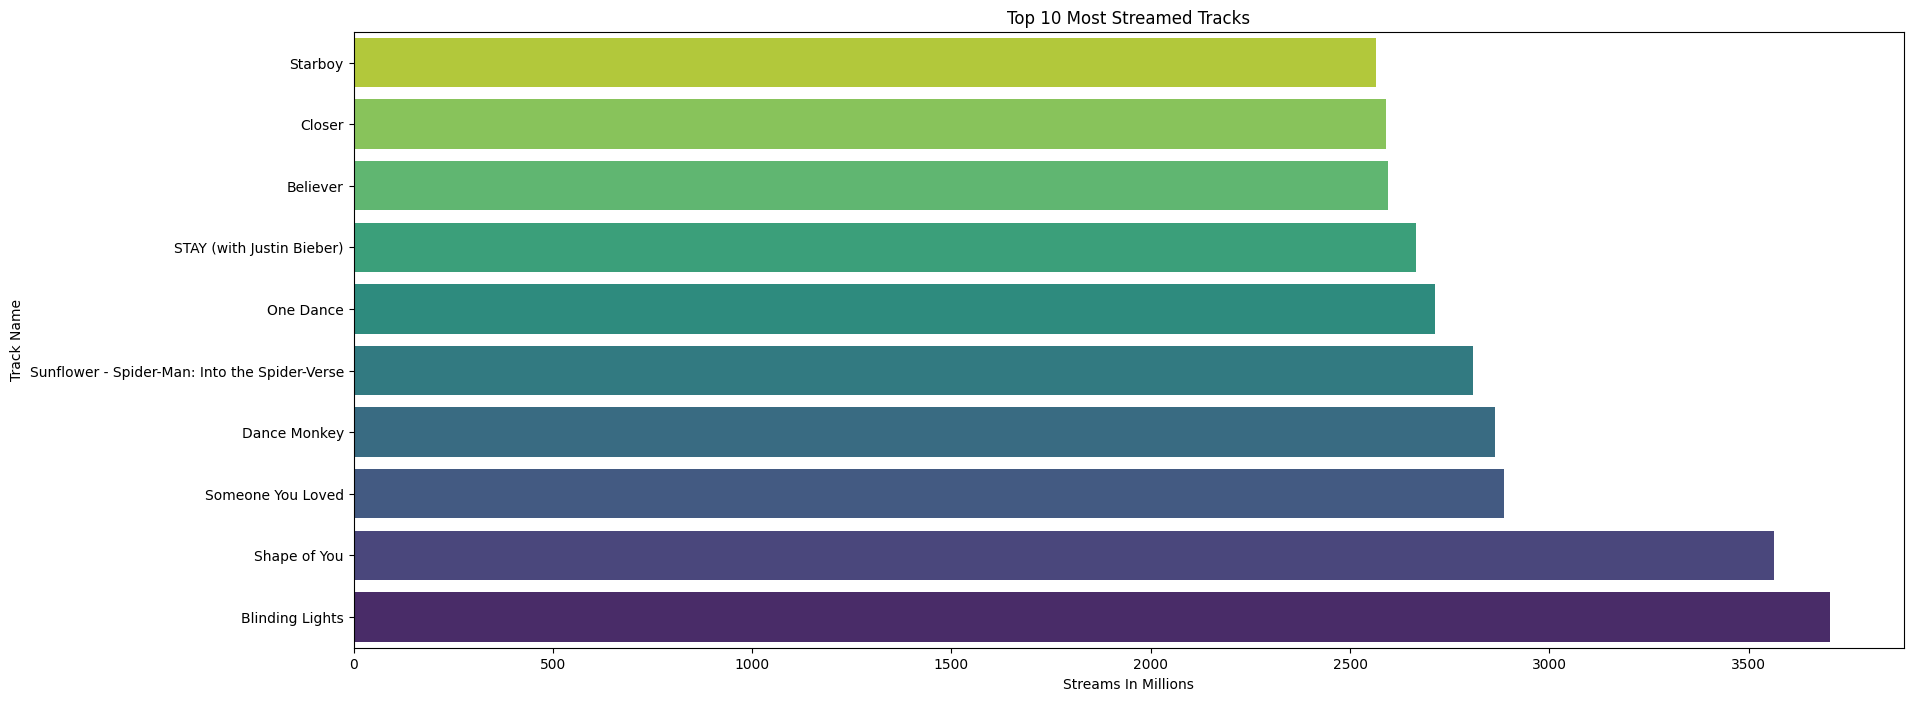

In [9]:
# Plotting the data
plt.figure(figsize=(20, 8))
sns.barplot(x='streams_in_millions', y='track_name', data=df1, palette='viridis')
plt.xlabel('Streams In Millions')
plt.ylabel('Track Name')
plt.title('Top 10 Most Streamed Tracks')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest streams at the top
plt.show()

# Interpretation:
### 
1. Track Popularity: The chart shows the most popular tracks based on the number of streams. The tracks are listed in descending order, with the highest streamed tracks at the top.
2. Stream Counts: The x-axis represents the number of streams, providing a clear comparison of the popularity of each track.
3. Visual Clarity: The use of a horizontal bar chart makes it easy to read the track names and compare their stream counts.


# 3. Average Streams by Release Last 10 Year:

In [10]:
query2 = """
SELECT 
    Released_Year, 
    AVG(Streams / 1000000) AS Average_Streams_in_Millions
FROM 
    Track
WHERE 
    Released_Year >= 2013
GROUP BY 
    Released_Year
ORDER BY 
    Released_Year;
"""

df2 = pd.read_sql(query2, conn)
print(df2.head())


   released_year  average_streams_in_millions
0           2013                  1219.846154
1           2014                  1263.538462
2           2015                   993.363636
3           2016                  1124.000000
4           2017                  1367.260870


/var/folders/22/qj3nptj96b74jyqh28tfl0cc0000gp/T/ipykernel_18913/3482087238.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn)


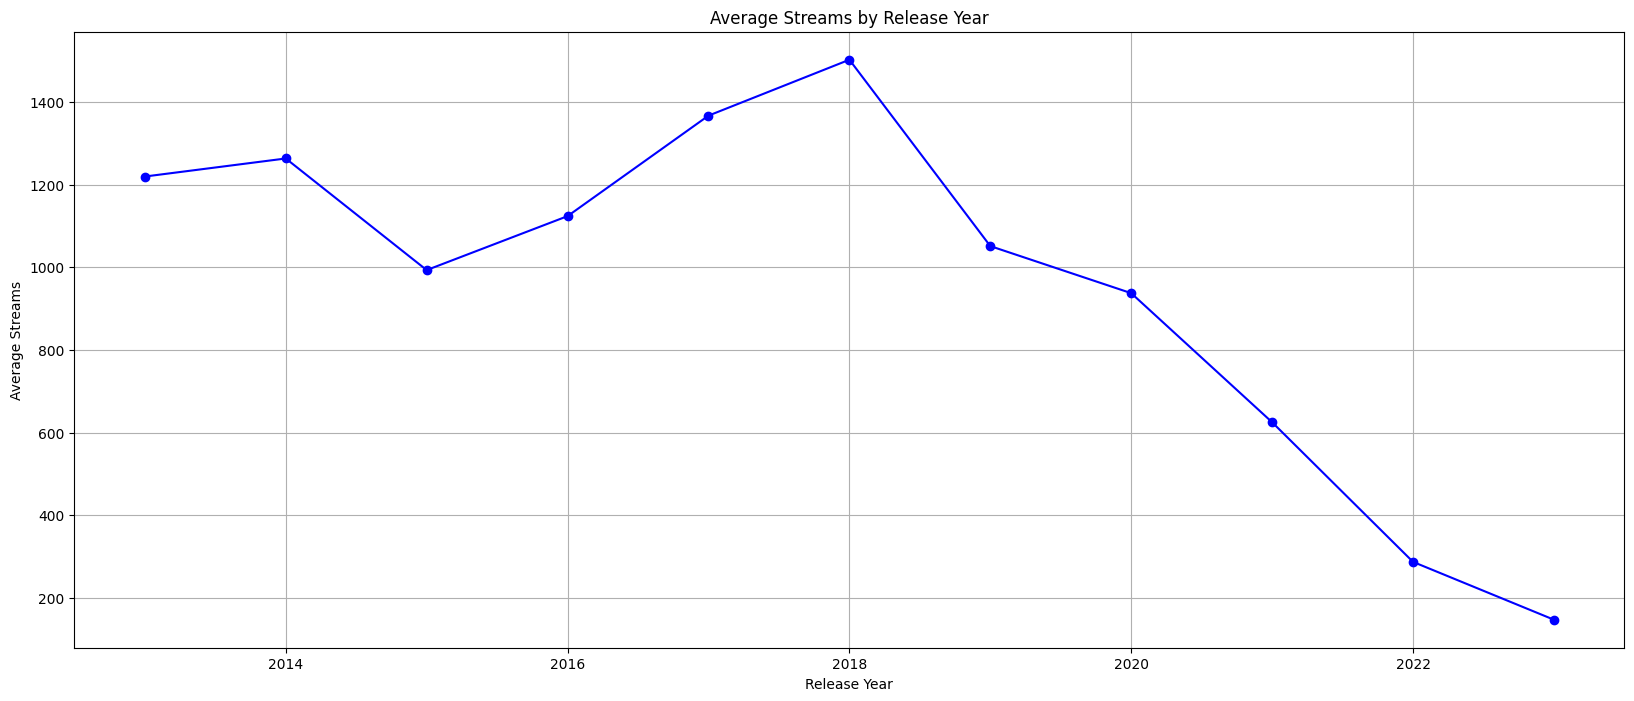

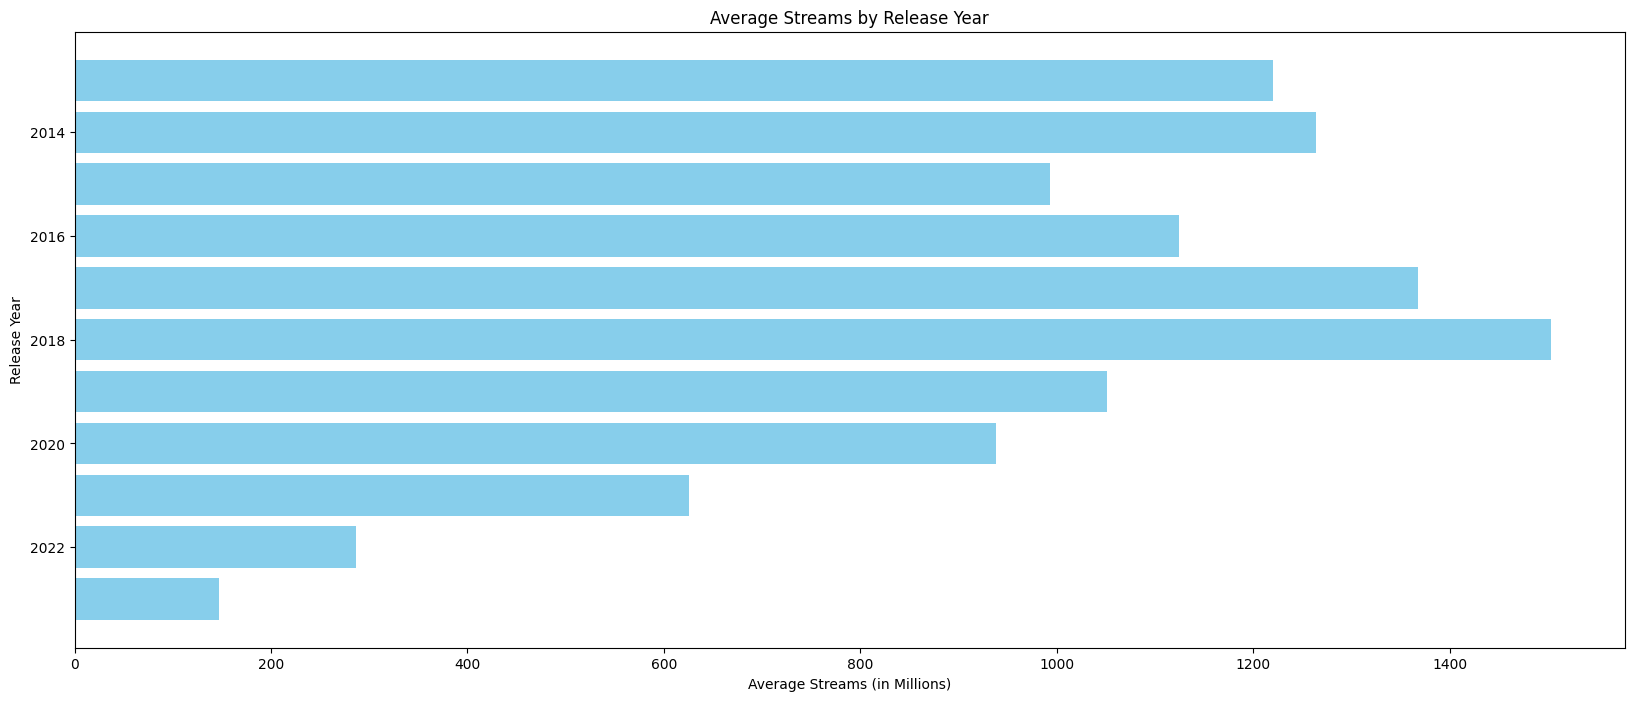

In [11]:
# Plotting the data
plt.figure(figsize=(20, 8))
plt.plot(df2['released_year'], df2['average_streams_in_millions'], marker='o', linestyle='-', color='b')
plt.xlabel('Release Year')
plt.ylabel('Average Streams')
plt.title('Average Streams by Release Year')
plt.grid(True)
plt.show()

# Plotting the data
plt.figure(figsize=(20, 8))
plt.barh(df2['released_year'], df2['average_streams_in_millions'], color='skyblue')
plt.xlabel('Average Streams (in Millions)')
plt.ylabel('Release Year')
plt.title('Average Streams by Release Year')
plt.gca().invert_yaxis()  # Invert y-axis to show the most recent year at the top
plt.show()

# Interpretation:
1. 2013-2014: The average streams were relatively high, with a slight increase from 121.54 million in 2013 to 125.92 million in 2014. This suggests a strong interest in songs released during these years.
2. 2015: There was a noticeable drop to 98.91 million average streams. This could indicate a shift in musical trends or competition from other entertainment forms.
3. 2016: The average streams rebounded to 112.06 million, showing a recovery in popularity for songs released this year.
4. 2017-2018: These years saw a significant increase in average streams, peaking at 149.70 million in 2018. This period might have featured particularly popular releases or a general increase in streaming activity.
5. 2019: There was a decline to 104.69 million average streams, suggesting a dip in the popularity of songs released this year compared to the previous two years.
6. 2020: The average streams further decreased to 93.35 million. This could be due to various factors, including changes in listener behavior during the pandemic.
7. 2021-2023: There was a sharp decline in average streams, dropping from 62.09 million in 2021 to just 14.23 million in 2023. This trend indicates a significant decrease in the popularity or streaming of songs released in these years.

## The most Streamed songs is for year 2018 in the last 10 years

# 4. Average Metrics for Top 100 Most Streamed Songs:

In [12]:
query3 = """
WITH Top_100_Tracks AS (
    SELECT Track_ID
    FROM Track
    ORDER BY Streams DESC
    LIMIT 100
)
SELECT AVG(m.Danceability_Percent) AS Avg_Danceability,
       AVG(m.Valence_Percent) AS Avg_Valence,
       AVG(m.Energy_Percent) AS Avg_Energy,
       AVG(m.Acousticness_Percent) AS Avg_Acousticness,
       AVG(m.Instrumentalness_Percent) AS Avg_Instrumentalness,
       AVG(m.Liveness_Percent) AS Avg_Liveness,
       AVG(m.Speechiness_Percent) AS Avg_Speechiness
FROM Metric m
JOIN Top_100_Tracks ttt ON m.Track_ID = ttt.Track_ID;
"""
df3 = pd.read_sql(query3, conn)
print(df3.head())


   avg_danceability  avg_valence  avg_energy  avg_acousticness  \
0             63.84        51.91       64.56              25.6   

   avg_instrumentalness  avg_liveness  avg_speechiness  
0                  0.74         19.34             8.82  


/var/folders/22/qj3nptj96b74jyqh28tfl0cc0000gp/T/ipykernel_18913/2947187386.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)


/var/folders/22/qj3nptj96b74jyqh28tfl0cc0000gp/T/ipykernel_18913/3728674576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df3.columns, y=df3.iloc[0], palette='viridis')


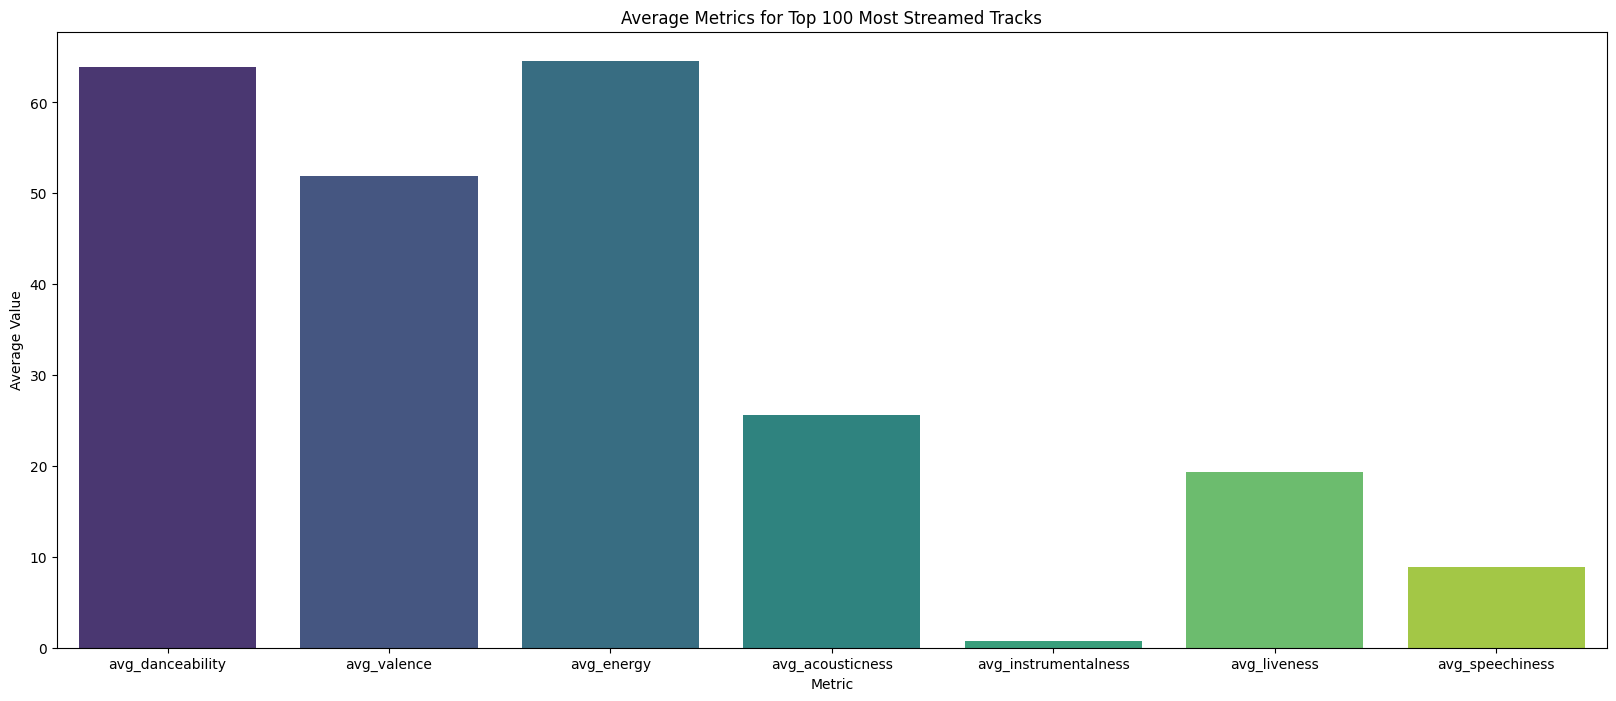

In [13]:
# Plotting the data
plt.figure(figsize=(20, 8))
sns.barplot(x=df3.columns, y=df3.iloc[0], palette='viridis')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.title('Average Metrics for Top 100 Most Streamed Tracks')
plt.show()

# Interpretation:
1. Danceability (63.84): This high value indicates that the most streamed songs are generally easy to dance to, with a strong rhythm and beat.
2. Valence (51.91): This mid-range value suggests that the songs have a balanced emotional tone, neither too happy nor too sad.
3. Energy (64.56): The high energy level implies that these songs are lively and dynamic, often featuring fast tempos and strong beats.
4. Acousticness (25.6): The relatively low acousticness indicates that most of these songs are produced with electronic or synthetic sounds rather than acoustic instruments.
5. Instrumentalness (0.74): The very low instrumentalness shows that these songs are predominantly vocal, with minimal instrumental-only sections.
6. Liveness (19.34): This low value suggests that the songs are not typically recorded live but are studio-produced.
7. Speechiness (8.82): The low speechiness indicates that the songs have more musical elements than spoken words, focusing on melody and harmony.

## Most Important Metric for Streaming Success
Danceability and Energy are likely the most important metrics for making a song highly streamed. High danceability makes a song enjoyable and engaging for listeners, encouraging repeated plays. Similarly, high energy keeps the listener's attention and makes the song suitable for various activities, such as workouts, parties, and driving.

# 5. Last 10 years of the average streams, mertics, and the number of songs released each year

In [14]:
query4 = """
SELECT 
    t.Released_Year,
    AVG(t.Streams / 10000000) AS Average_Streams,
    AVG(m.Danceability_Percent) AS Avg_Danceability,
    AVG(m.Energy_Percent) AS Avg_Energy,
    AVG(m.Valence_Percent) AS Avg_Valence,
    AVG(m.Acousticness_Percent) AS Avg_Acousticness,
    AVG(m.Instrumentalness_Percent) AS Avg_Instrumentalness,
    AVG(m.Liveness_Percent) AS Avg_Liveness,
    AVG(m.Speechiness_Percent) AS Avg_Speechiness,
    COUNT(*) AS Number_of_Songs
FROM 
    Track t
JOIN 
    Metric m ON t.Track_ID = m.Track_ID
WHERE 
    t.Released_Year >= 2013
GROUP BY 
    t.Released_Year
ORDER BY 
    t.Released_Year;
"""
df4 = pd.read_sql(query4, conn)
print(df4.head())

   released_year  average_streams  avg_danceability  avg_energy  avg_valence  \
0           2013       121.538462         51.384615   55.307692    49.692308   
1           2014       125.923077         63.538462   69.692308    51.153846   
2           2015        98.909091         62.000000   65.090909    38.181818   
3           2016       112.055556         65.222222   62.222222    51.277778   
4           2017       136.217391         65.130435   62.173913    50.086957   

   avg_acousticness  avg_instrumentalness  avg_liveness  avg_speechiness  \
0         32.923077              1.153846     16.846154         5.692308   
1         33.769231              3.230769     15.615385        12.615385   
2         26.727273              8.090909     26.727273         6.818182   
3         22.333333              2.777778     20.944444        10.944444   
4         27.739130              2.000000     13.695652         9.043478   

   number_of_songs  
0               13  
1               13  

/var/folders/22/qj3nptj96b74jyqh28tfl0cc0000gp/T/ipykernel_18913/922065484.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4, conn)


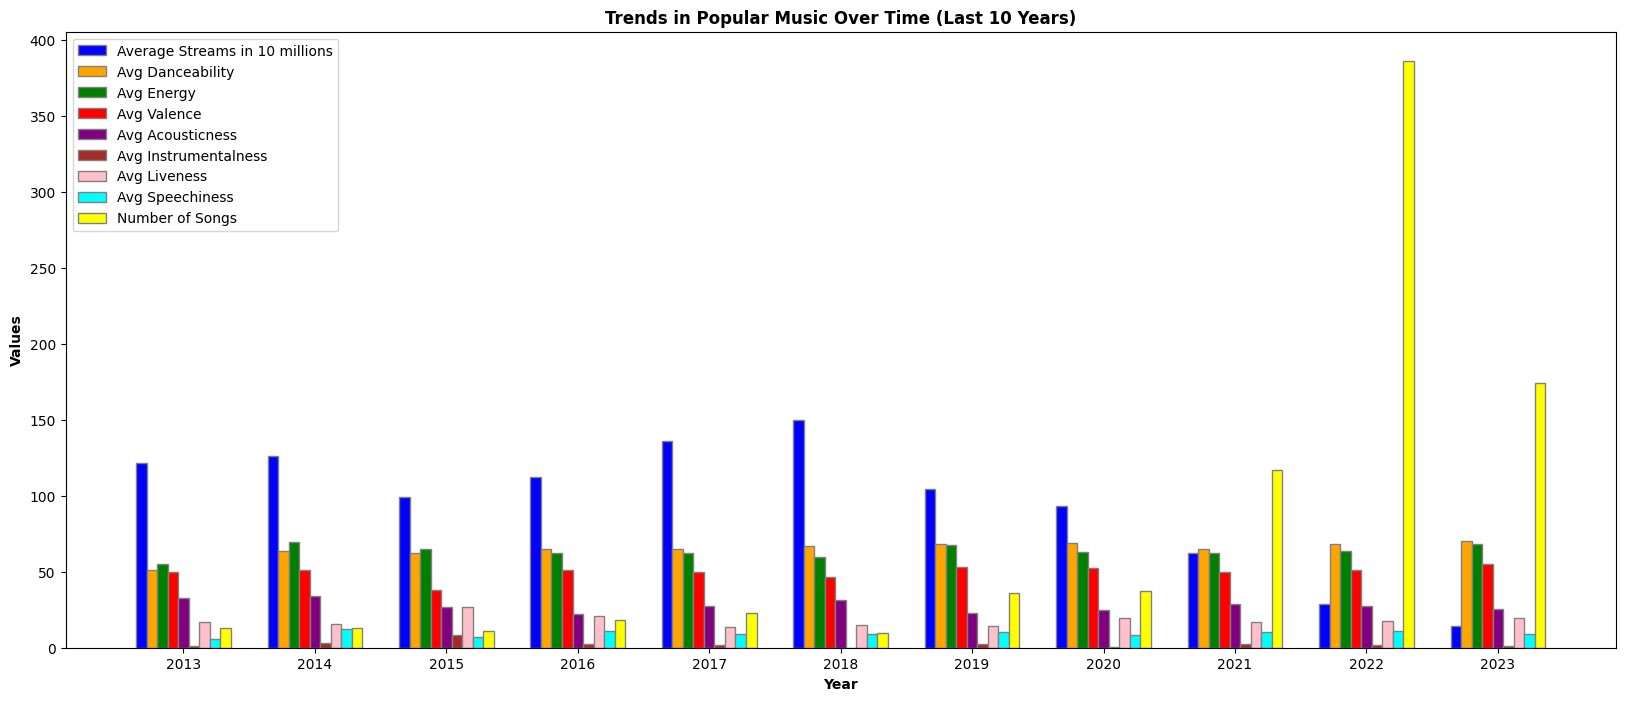

In [15]:

# Set the width of the bars
bar_width = 0.08
# Set the positions of the bars on the x-axis
r1 = np.arange(len(df4['released_year']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]
r7 = [x + bar_width for x in r6]
r8 = [x + bar_width for x in r7]
r9 = [x + bar_width for x in r8]
r10 = [x + bar_width for x in r9]

# Plotting the data
plt.figure(figsize=(20, 8))

# Create bars
plt.bar(r1, df4['average_streams'], color='b', width=bar_width, edgecolor='grey', label='Average Streams in 10 millions')
plt.bar(r2, df4['avg_danceability'], color='orange', width=bar_width, edgecolor='grey', label='Avg Danceability')
plt.bar(r3, df4['avg_energy'], color='g', width=bar_width, edgecolor='grey', label='Avg Energy')
plt.bar(r4, df4['avg_valence'], color='r', width=bar_width, edgecolor='grey', label='Avg Valence')
plt.bar(r5, df4['avg_acousticness'], color='purple', width=bar_width, edgecolor='grey', label='Avg Acousticness')
plt.bar(r6, df4['avg_instrumentalness'], color='brown', width=bar_width, edgecolor='grey', label='Avg Instrumentalness')
plt.bar(r7, df4['avg_liveness'], color='pink', width=bar_width, edgecolor='grey', label='Avg Liveness')
plt.bar(r8, df4['avg_speechiness'], color='cyan', width=bar_width, edgecolor='grey', label='Avg Speechiness')
plt.bar(r9, df4['number_of_songs'], color='yellow', width=bar_width, edgecolor='grey', label='Number of Songs')

# Add labels
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.title('Trends in Popular Music Over Time (Last 10 Years)', fontweight='bold')
plt.xticks([r + 4 * bar_width for r in range(len(df4['released_year']))], df4['released_year'])

# Add legend
plt.legend()

# Show the plot
plt.show()

# Interpretation:
1. **2013-2014**:
   - **Average Streams**: Both years had high average streams, with a slight increase in 2014.
   - **Metrics**: Danceability and energy increased significantly in 2014, suggesting a shift towards more upbeat and energetic songs.
   - **Number of Songs**: Both years had a similar number of songs released (13 each).

2. **2015**:
   - **Average Streams**: There was a noticeable drop in average streams.
   - **Metrics**: Danceability and energy remained high, but valence dropped, indicating a shift towards less happy songs.
   - **Number of Songs**: Fewer songs were released (11).

3. **2016**:
   - **Average Streams**: Streams increased again.
   - **Metrics**: Danceability and energy remained high, with a balanced valence.
   - **Number of Songs**: More songs were released (18).

4. **2017-2018**:
   - **Average Streams**: 2017 saw a significant increase, peaking in 2018.
   - **Metrics**: High danceability and energy, with a slight decrease in valence in 2018.
   - **Number of Songs**: 2017 had more songs released (23), while 2018 had fewer (10).

5. **2019-2020**:
   - **Average Streams**: There was a decline in 2019 and further in 2020.
   - **Metrics**: High danceability and energy, with consistent valence.
   - **Number of Songs**: A significant increase in the number of songs released (36 in 2019 and 37 in 2020).

6. **2021-2023**:
   - **Average Streams**: A sharp decline in average streams, especially in 2022 and 2023.
   - **Metrics**: Danceability and energy remained high, with a slight increase in valence in 2023.
   - **Number of Songs**: A dramatic increase in the number of songs released, peaking at 386 in 2022 and 174 in 2023.

### Most Important Metric for Streaming Success

**Danceability** and **Energy** appear to be the most crucial metrics for streaming success. High danceability makes songs more engaging and enjoyable, while high energy keeps listeners' attention. These factors likely contribute to higher streaming numbers, as they make songs suitable for various activities and settings.


# 6. Correlation between the streams and the metric values

In [16]:
query5 = """
SELECT 
    t.Released_Year,
    AVG(t.Streams / 10000000) AS Average_Streams,
    AVG(m.Danceability_Percent) AS Avg_Danceability,
    AVG(m.Energy_Percent) AS Avg_Energy,
    AVG(m.Valence_Percent) AS Avg_Valence,
    AVG(m.Acousticness_Percent) AS Avg_Acousticness,
    AVG(m.Instrumentalness_Percent) AS Avg_Instrumentalness,
    AVG(m.Liveness_Percent) AS Avg_Liveness,
    AVG(m.Speechiness_Percent) AS Avg_Speechiness,
    COUNT(*) AS Number_of_Songs
FROM 
    Track t
JOIN 
    Metric m ON t.Track_ID = m.Track_ID
WHERE 
    t.Released_Year >= 2013
GROUP BY 
    t.Released_Year
ORDER BY 
    t.Released_Year;
"""
df5 = pd.read_sql(query5, conn)
print(df5.head())

   released_year  average_streams  avg_danceability  avg_energy  avg_valence  \
0           2013       121.538462         51.384615   55.307692    49.692308   
1           2014       125.923077         63.538462   69.692308    51.153846   
2           2015        98.909091         62.000000   65.090909    38.181818   
3           2016       112.055556         65.222222   62.222222    51.277778   
4           2017       136.217391         65.130435   62.173913    50.086957   

   avg_acousticness  avg_instrumentalness  avg_liveness  avg_speechiness  \
0         32.923077              1.153846     16.846154         5.692308   
1         33.769231              3.230769     15.615385        12.615385   
2         26.727273              8.090909     26.727273         6.818182   
3         22.333333              2.777778     20.944444        10.944444   
4         27.739130              2.000000     13.695652         9.043478   

   number_of_songs  
0               13  
1               13  

/var/folders/22/qj3nptj96b74jyqh28tfl0cc0000gp/T/ipykernel_18913/4172682392.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query5, conn)


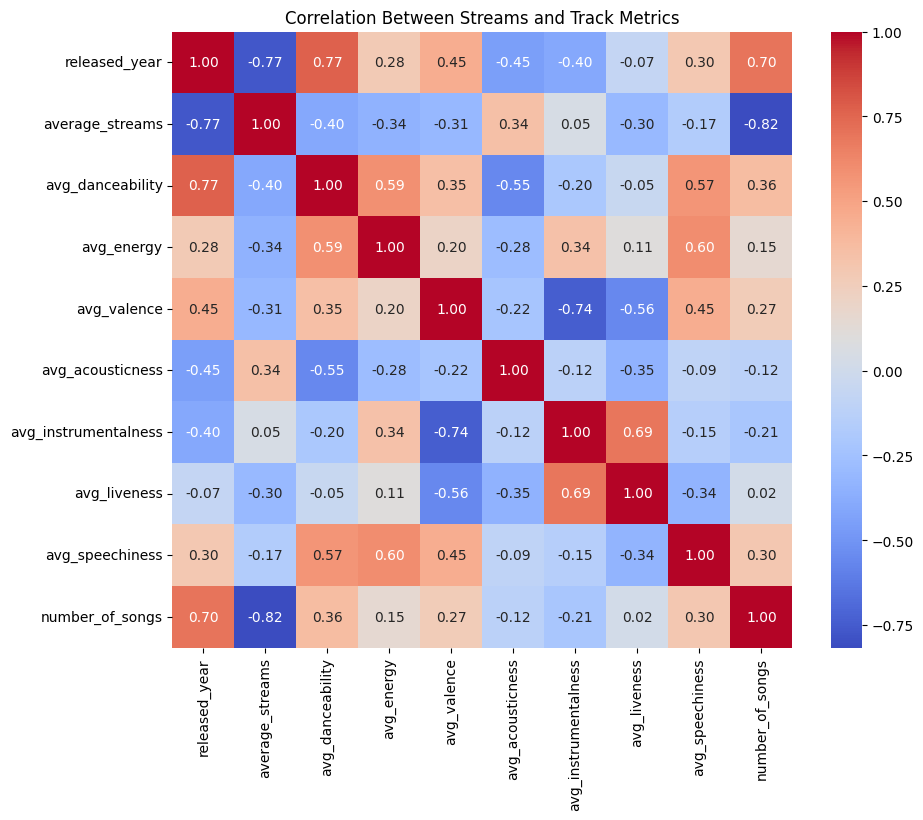

In [17]:
# Calculate the correlation matrix
correlation_matrix = df5.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Streams and Track Metrics')
plt.show()

# Interpretation

1. **Released Year (-0.77)**: There is a strong negative correlation between the release year and average streams, indicating that more recent songs tend to have lower average streams.
2. **Average Danceability (-0.40)**: There is a moderate negative correlation, suggesting that higher danceability is associated with lower average streams.
3. **Average Energy (-0.34)**: A moderate negative correlation indicates that higher energy levels are also associated with lower average streams.
4. **Average Valence (-0.31)**: This moderate negative correlation suggests that songs with higher valence (happiness) tend to have lower average streams.
5. **Average Acousticness (0.34)**: A moderate positive correlation indicates that songs with higher acousticness tend to have higher average streams.
6. **Average Instrumentalness (0.05)**: There is a very weak positive correlation, suggesting that instrumentalness has little to no impact on average streams.
7. **Average Liveness (-0.30)**: A weak negative correlation indicates that higher liveness is slightly associated with lower average streams.
8. **Average Speechiness (-0.17)**: A weak negative correlation suggests that higher speechiness is slightly associated with lower average streams.
9. **Number of Songs (-0.82)**: There is a strong negative correlation, indicating that years with more songs released tend to have lower average streams per song.

### Insights

- **Release Year and Number of Songs**: The most significant negative correlations are with the release year and the number of songs, suggesting that more recent years and higher numbers of song releases are associated with lower average streams.
- **Acousticness**: The only metric with a positive correlation, indicating that more acoustic songs tend to have higher average streams.


# 7. Songs with High Instrumentalness, Liveness, and Speechiness and High Streaming Numbers

In [18]:
query6 = """
SELECT t.Track_Name, 
       (t.Streams / 1000000) AS Streams_in_Millions, 
       m.Instrumentalness_Percent, 
       m.Liveness_Percent, 
       m.Speechiness_Percent
FROM Track t
JOIN Metric m ON t.Track_ID = m.Track_ID
WHERE m.Instrumentalness_Percent > 0.7 
  AND m.Liveness_Percent > 0.7 
  AND m.Speechiness_Percent > 0.7
ORDER BY t.Streams DESC
LIMIT 10;

"""
df6 = pd.read_sql(query6, conn)
print(df6.head())

                              track_name  streams_in_millions  \
0                                   Se?o                 2484   
1                        Sweater Weather                 2282   
2                       The Night We Met                 1410   
3  Quevedo: Bzrp Music Sessions, Vol. 52                 1356   
4                       I Wanna Be Yours                 1297   

   instrumentalness_percent  liveness_percent  speechiness_percent  
0                      42.0              11.0                  3.0  
1                       2.0              10.0                  3.0  
2                      25.0              64.0                  4.0  
3                       3.0              23.0                  4.0  
4                       2.0              11.0                  3.0  


/var/folders/22/qj3nptj96b74jyqh28tfl0cc0000gp/T/ipykernel_18913/1746397322.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql(query6, conn)


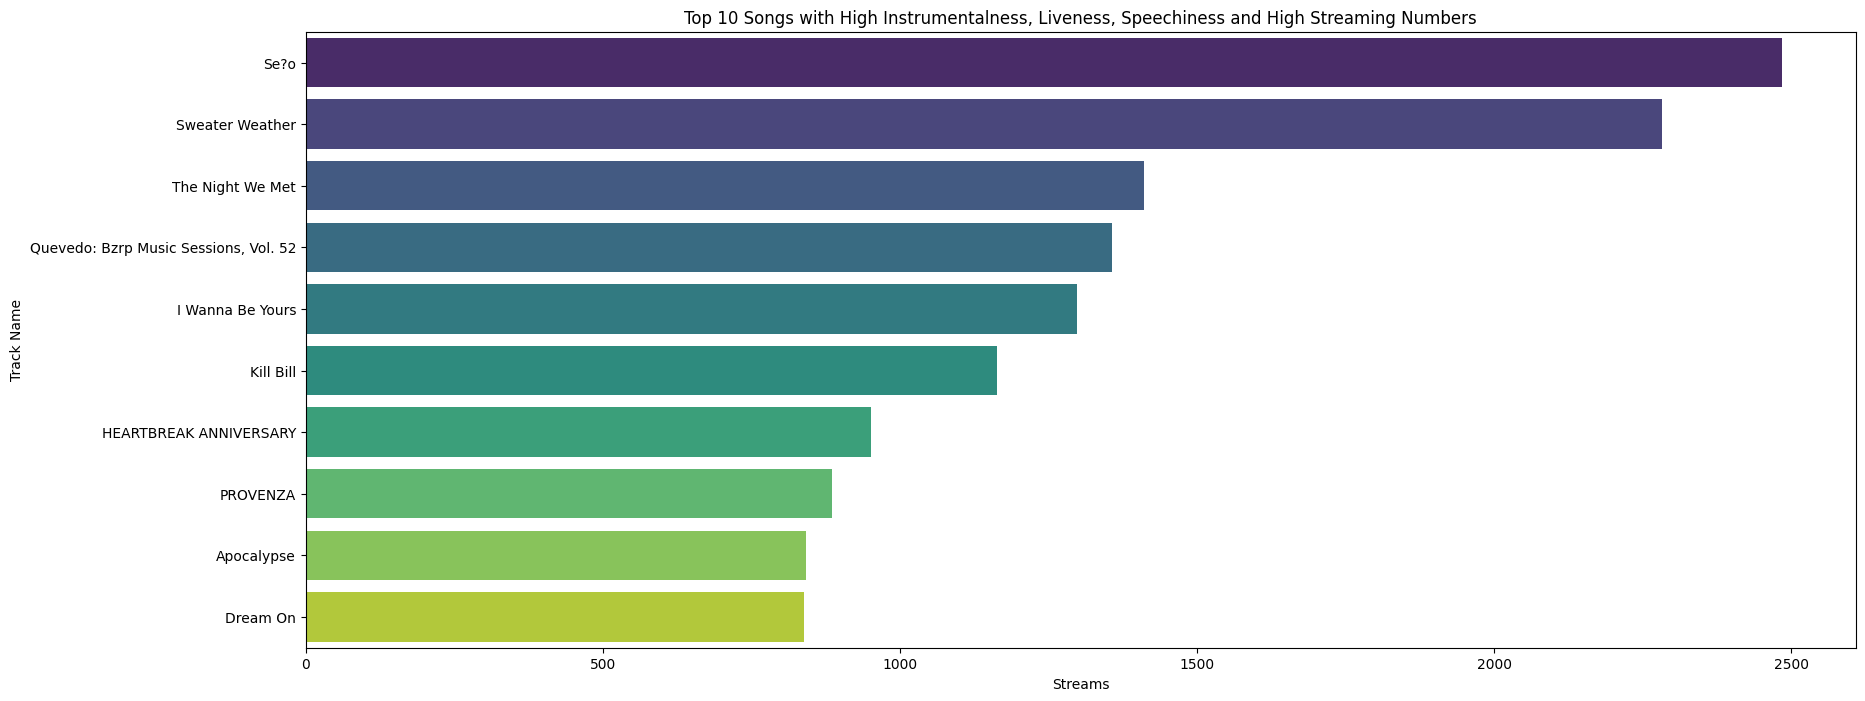

In [19]:
# Plotting the data
plt.figure(figsize=(20, 8))
sns.barplot(x='streams_in_millions', y='track_name', data=df6, hue='track_name', palette='viridis', dodge=False)
plt.title('Top 10 Songs with High Instrumentalness, Liveness, Speechiness and High Streaming Numbers')
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.legend([],[], frameon=False)
plt.show()

## Interpretation:

1. The top 10 songs with the highest streams also have high values for instrumentalness, liveness, and speechiness.
2. Only two songs have higher streams than 1.5 million.
3. These songs demonstrate that high instrumental, live performance, and speech content can still achieve significant popularity.

# 8. Top 10 Streamed Songs in Charts And Playlists Across Platforms

In [20]:
query7 = """
WITH Top_10_Tracks AS (
    SELECT Track_ID, Track_Name, Streams
    FROM Track
    ORDER BY Streams DESC
    LIMIT 10
)
SELECT 
    ttt.Track_Name,
    p.Platform_Name,
    p.In_Playlists,
    p.In_Charts
FROM 
    Top_10_Tracks ttt
JOIN 
    Platform p ON ttt.Track_ID = p.Track_ID
ORDER BY 
    ttt.Track_Name, p.Platform_Name;
"""
df7 = pd.read_sql(query7, conn)
print(df7.head())

        track_name platform_name  in_playlists  in_charts
0         Believer         Apple           250        121
1         Believer        Deezer          2969         10
2         Believer        Shazam             0         31
3         Believer       Spotify         18986         23
4  Blinding Lights         Apple           672        199


/var/folders/22/qj3nptj96b74jyqh28tfl0cc0000gp/T/ipykernel_18913/1675076592.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7 = pd.read_sql(query7, conn)


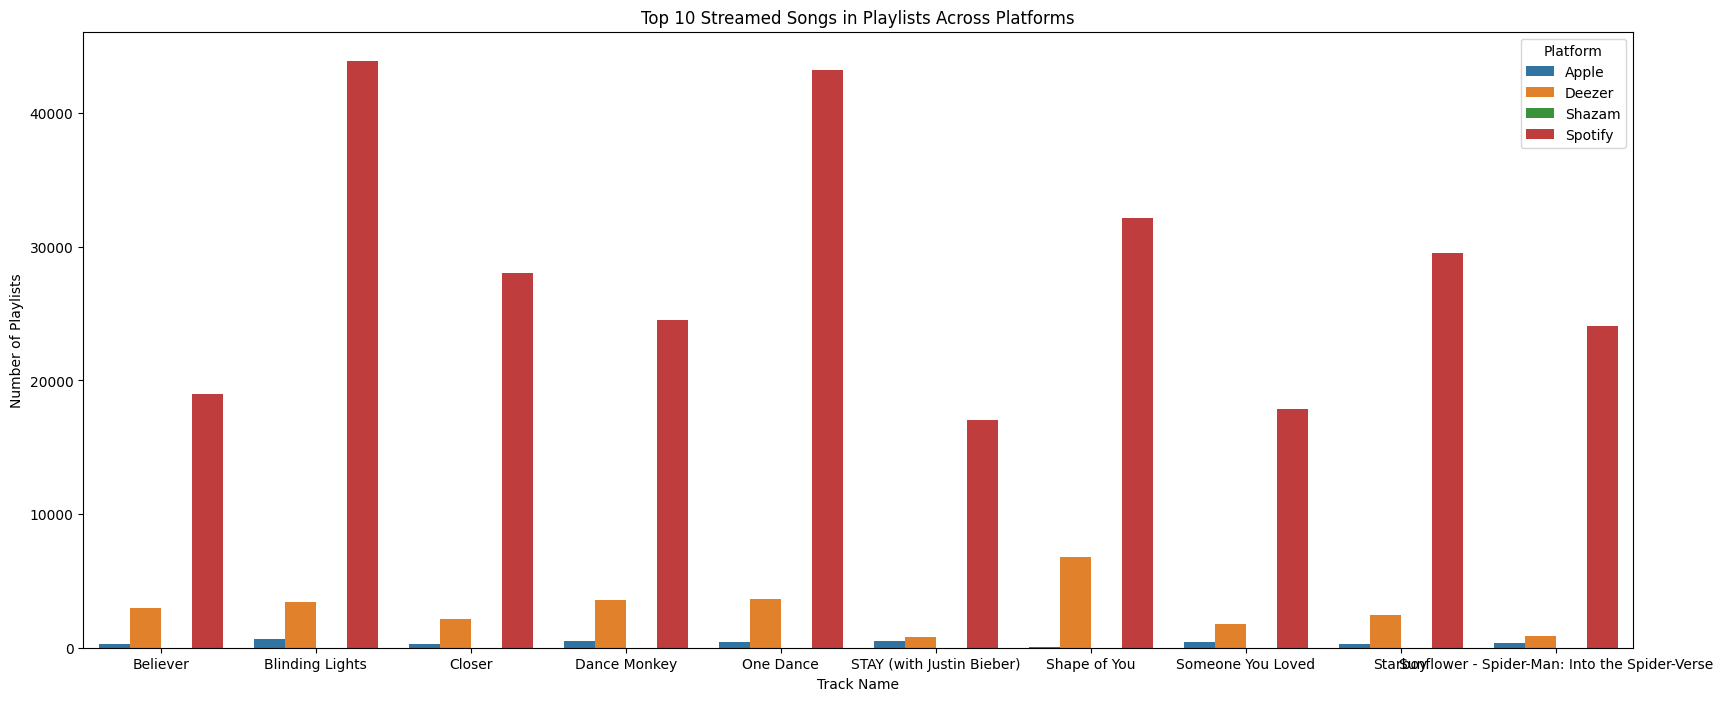

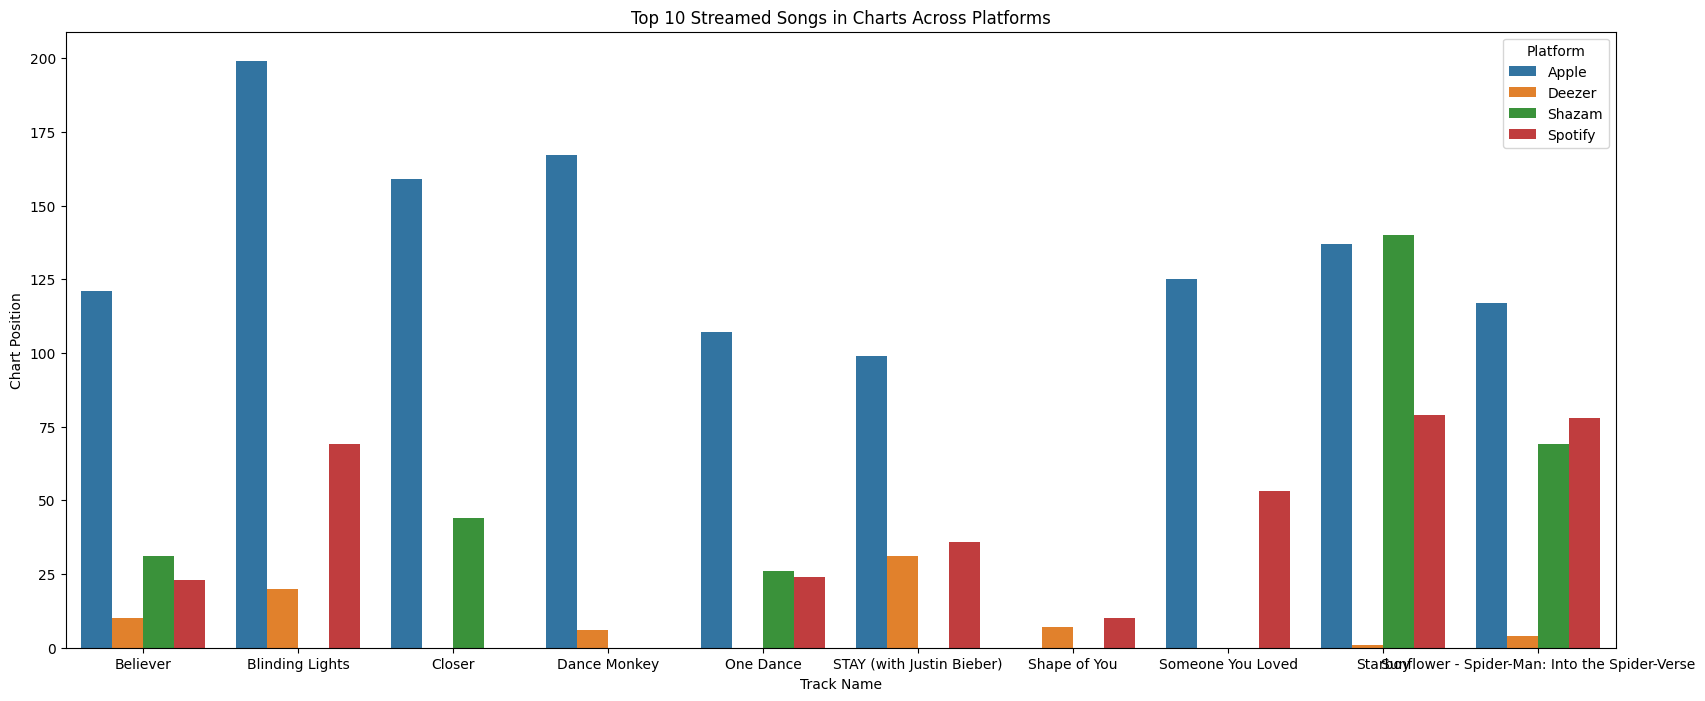

In [21]:
# Plotting the data
plt.figure(figsize=(20, 8))
sns.barplot(x='track_name', y='in_playlists', hue='platform_name', data=df7)
plt.title('Top 10 Streamed Songs in Playlists Across Platforms')
plt.xlabel('Track Name')
plt.ylabel('Number of Playlists')
plt.legend(title='Platform')
plt.show()

plt.figure(figsize=(20, 8))
sns.barplot(x='track_name', y='in_charts', hue='platform_name', data=df7)
plt.title('Top 10 Streamed Songs in Charts Across Platforms')
plt.xlabel('Track Name')
plt.ylabel('Chart Position')
plt.legend(title='Platform')
plt.show()

# Interpretation

1. **Believer**:
   - **Apple**: 250 playlists, 121 charts
   - **Deezer**: 2969 playlists, 10 charts
   - **Shazam**: 0 playlists, 31 charts
   - **Spotify**: 18986 playlists, 23 charts
   - **Insight**: Strong presence in playlists, especially on Spotify and Deezer, indicating high user engagement.

2. **Blinding Lights**:
   - **Apple**: 672 playlists, 199 charts
   - **Deezer**: 3421 playlists, 20 charts
   - **Shazam**: 0 playlists, 0 charts
   - **Spotify**: 43899 playlists, 69 charts
   - **Insight**: Extremely popular on Spotify, with significant chart presence on Apple.

3. **Closer**:
   - **Apple**: 315 playlists, 159 charts
   - **Deezer**: 2179 playlists, 0 charts
   - **Shazam**: 0 playlists, 44 charts
   - **Spotify**: 28032 playlists, 0 charts
   - **Insight**: High playlist inclusion on Spotify, with notable chart presence on Apple.

4. **Dance Monkey**:
   - **Apple**: 533 playlists, 167 charts
   - **Deezer**: 3595 playlists, 6 charts
   - **Shazam**: 0 playlists, 0 charts
   - **Spotify**: 24529 playlists, 0 charts
   - **Insight**: Strong playlist presence on Spotify and Deezer, with significant chart presence on Apple.

5. **One Dance**:
   - **Apple**: 433 playlists, 107 charts
   - **Deezer**: 3631 playlists, 0 charts
   - **Shazam**: 0 playlists, 26 charts
   - **Spotify**: 43257 playlists, 24 charts
   - **Insight**: High playlist inclusion on Spotify and Deezer, with moderate chart presence on Apple.

6. **STAY (with Justin Bieber)**:
   - **Apple**: 492 playlists, 99 charts
   - **Deezer**: 798 playlists, 31 charts
   - **Shazam**: 0 playlists, 0 charts
   - **Spotify**: 17050 playlists, 36 charts
   - **Insight**: Strong playlist presence on Spotify, with moderate chart presence on Apple and Deezer.

7. **Shape of You**:
   - **Apple**: 33 playlists, 0 charts
   - **Deezer**: 6808 playlists, 7 charts
   - **Shazam**: 0 playlists, 0 charts
   - **Spotify**: 32181 playlists, 10 charts
   - **Insight**: Extremely high playlist inclusion on Deezer and Spotify, with minimal chart presence.

8. **Someone You Loved**:
   - **Apple**: 440 playlists, 125 charts
   - **Deezer**: 1800 playlists, 0 charts
   - **Shazam**: 0 playlists, 0 charts
   - **Spotify**: 17836 playlists, 53 charts
   - **Insight**: Strong playlist presence on Spotify, with significant chart presence on Apple.

9. **Starboy**:
   - **Apple**: 281 playlists, 137 charts
   - **Deezer**: 2445 playlists, 1 chart
   - **Shazam**: 0 playlists, 140 charts
   - **Spotify**: 29536 playlists, 79 charts
   - **Insight**: High playlist inclusion on Spotify, with significant chart presence on Apple and Shazam.

10. **Sunflower - Spider-Man: Into the Spider-Verse**:
    - **Apple**: 372 playlists, 117 charts
    - **Deezer**: 843 playlists, 4 charts
    - **Shazam**: 0 playlists, 69 charts
    - **Spotify**: 24094 playlists, 78 charts
    - **Insight**: Strong playlist presence on Spotify, with notable chart presence on Apple and Shazam.

### General Insights

- **Spotify**: Dominates in playlist inclusion across all songs, indicating high user engagement and discoverability.
- **Apple**: Shows strong chart presence, suggesting that songs are frequently featured in top charts.
- **Deezer**: Also has significant playlist inclusion, though chart presence is generally lower.
- **Shazam**: Limited playlist presence but notable chart presence for some songs, indicating popularity in song identification.


In [22]:
# Close the cursor and connection
cursor.close()
conn.close()